# Introduction

Diabetes is a metabolic disease caused by elevated levels of blood glucose, leading to significant damage to vital organ systems. According to the World Health Organization, approximately 422 million people are diabetic, with 1.5 million deaths directly attributed to the condition.

While long-term risks can be mitigated through monitoring and treatment, short-term dangers can be severe and potentially fatal for diabetic patients.

Fortunately, in most cases, diagnosing diabetes is relatively inexpensive and accessible. In order to make it more accessible and free of cost, we aim to uncover methods to predict an individual's likelihood of suffering from diabetes based on various characteristics i.e. hypertension, age, gender, etc.

To start, we discovered a dataset from Kaggle.com to train and explore diabetes, aiming to uncover patterns, correlations, and insights that can inform both medical understanding and eventually predict whether someone has diabetes or not.




## Data Description

**Objective:** The objective of this project is to develop a robust model for predicting the likelihood of diabetes in patients based on their medical history and demographic information. Such predictions can be immensely valuable for healthcare professionals in identifying individuals who may be at risk of developing diabetes.

**Dataset:** The dataset used for this project is the Diabetes Prediction Dataset, which comprises a comprehensive collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The dataset encompasses several essential features including age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

To access the **complete dataset**, please visit the following page: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Domain Knowledge

1. `Age`: Age is important factor in predicting diabetes risk. As people get older, they become more likely to develop diabetes. This is because things like being less active, changes in hormones, and having other health problems.

2.  `Gender`: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

3. `Body Mass Index(BMI)`: BMI measures body fat based on height and weight. A higher BMI means a higher risk of type 2 diabetes. Too much fat, especially around the waist, can make it hard for the body to control blood sugar.

4. `Hypertension`: High blood pressure often comes with diabetes. They both have similar causes and make each other worse. Having high blood pressure raises the chances of getting type 2 diabetes, and having diabetes raises the chances of getting high blood pressure.

5. `Heart Disease`: Diabetes and heart disease often go together. Having one makes it more likely to get the other because they share many of the same risk factors, like being overweight or having high cholesterol.

6. `Smoking History`: Smoking can increase the chances of getting type 2 diabetes. It messes with how the body handles insulin and glucose. But if someone quits smoking, they can lower their risk of getting diabetes.

7. `HbA1c Level`: HbA1c (glycated hemoglobin) shows the average blood glucose level over a few months. If the HbA1c level is high, it means blood sugar hasn't been well controlled, raising the risk of diabetes and its complications.

8. `Blood Glucose Level`: This shows how much sugar is in the blood at a given time. If it's too high, especially when someone hasn't eaten or after they eat carbs, it can mean they're at risk for diabetes. Keeping an eye on blood sugar levels is important for managing diabetes.

These features, when combined and analyzed with appropriate statistical and machine learning techniques, can help in predicting an individual's risk of developing diabetes.


# Setting Up
This section contains the initial process carried out before starting to analyze the data. This includes steps such as setting up the work environment, downloading or loading data, importing necessary software or libraries, and preparing other tools and resources necessary to properly analyze the data.

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00


In [ ]:
# General
import numpy as np
import pandas as pd
import json

# Graph
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Preprocessing utilities
from sklearn.preprocessing import StandardScaler

# Sampling methods
from imblearn.over_sampling import SMOTE

# General Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Serialize and de-serialize a python object structure
import pickle

## Importing Libraries
- `numpy` and `pandas` are utilized for data manipulation tasks.
- `catboost` libraries are imported to be our main prediction model. Other classifiers such as `XGBoost`, `LogisticRegression`, and `RandomForestClassifier` are imported as a comparison.
- `SMOTE` is brought in for oversampling purposes, while `StandardScaler` is used for standardization for numerical data.
- Metrics functions including `accuracy_score`, `precision_score`, and `confusion_matrix` are imported for model evaluation.
- `matplotlib` and `seaborn`is employed for data visualization

In [ ]:
!pip install -q kaggle

In [ ]:
cred = {"username":"karinarahmawati","key":"d414ff81116181f1d8dae59293ba8470"}

In [ ]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

api_token = cred

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 27.1MB/s]


In [ ]:
!unzip "diabetes-prediction-dataset.zip"

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Exploratory Data Analysis

This section involves performing exploratory data analysis to gain insights into the dataset. Through data description, visualization and correlation map, we explore the distributions, relationships, and characteristics of the variables.

## Data Description
To describe the outline of the data such as shape, data types, unique values and percentage of missing values.

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
# Concatenates data types, unique values, and percentage of NaN values
info = pd.concat([df.dtypes, df.nunique(), df.isnull().sum()*100/len(df)], axis=1)
info.columns = ['dtypes', 'nunique', 'nan %']
info

,dtypes,nunique,nan %
gender,object,3,0.0
age,float64,102,0.0
hypertension,int64,2,0.0
heart_disease,int64,2,0.0
smoking_history,object,6,0.0
bmi,float64,4247,0.0
HbA1c_level,float64,18,0.0
blood_glucose_level,int64,18,0.0
diabetes,int64,2,0.0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Data Visualization

There are several categorical and numerical columns that will be explored from this dataset,

### Data Visualization

#### Categorical Data:

1. **Gender:** Female or Male

2. **Hypertension:** Yes (1) or No (0)

3. **Heart Disease:** Yes (1) or No (0)

4. **Smoking History:**
   - Never
   - Ever
   - Current
   - Former
   - No Information Available

5. **Diabetes:** Yes (1) or No (0)

#### Numerical Data:

1. **Age**
2. **BMI (Body Mass Index)**
3. **HbA1c Level**
4. **Blood Glucose Level**

### Categorical Data

#### Gender

In [ ]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

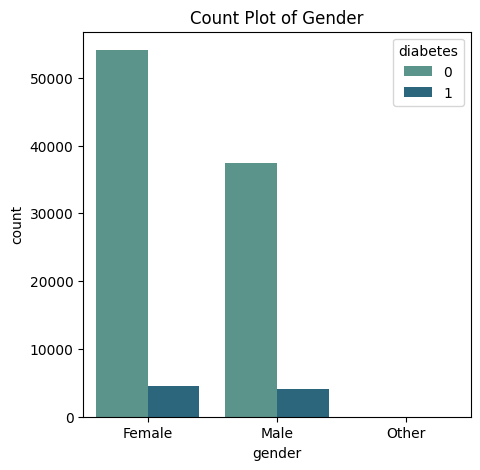

In [ ]:
# Plot a count of gender categorized by diabetes status
plt.figure(figsize=(5,5))
sns.countplot(x='gender', data=df, palette='crest', hue='diabetes').set(title='Count Plot of Gender')
plt.show()

#### Hypertension

In [ ]:
df['hypertension'].value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

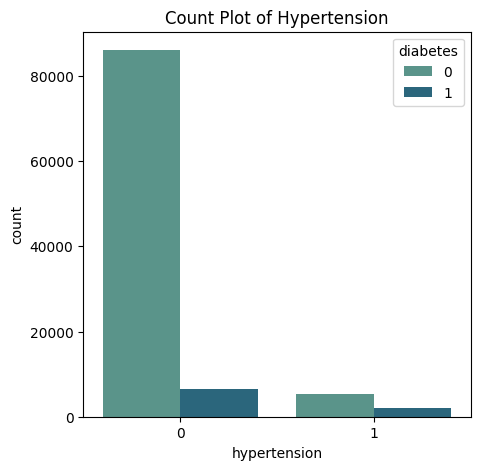

In [ ]:
# Plot a count of hypertension cases categorized by diabetes status
plt.figure(figsize=(5,5))
sns.countplot(x='hypertension', data=df, palette='crest', hue='diabetes').set(title='Count Plot of Hypertension')
plt.show()

#### Heart Disease

In [ ]:
df['heart_disease'].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

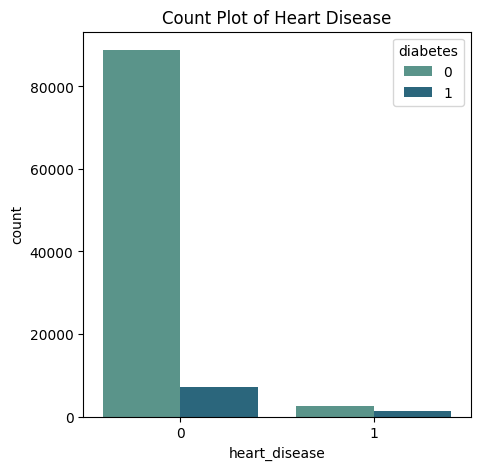

In [ ]:
# Plot a count of heart disease cases categorized by diabetes status
plt.figure(figsize=(5,5))
sns.countplot(x='heart_disease', data=df, palette='crest', hue='diabetes').set(title='Count Plot of Heart Disease')
plt.show()

#### Smoking History

In [ ]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

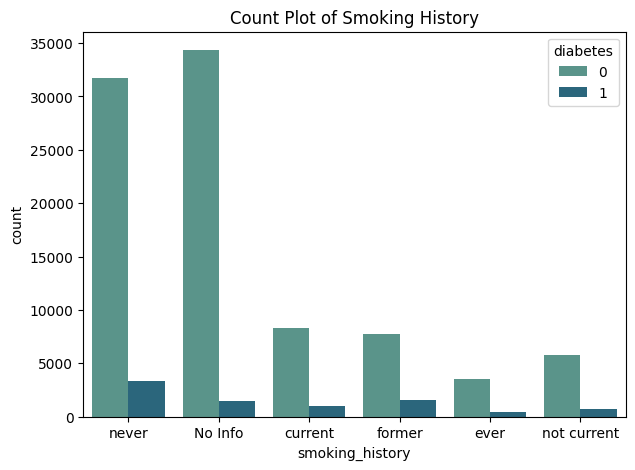

In [ ]:
# Plot a count of smoking history cases categorized by diabetes status
plt.figure(figsize=(7,5))
sns.countplot(x='smoking_history', data=df, palette='crest', hue='diabetes').set(title='Count Plot of Smoking History')
plt.show()

#### Diabetes

In [ ]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<ipython-input-164-f9b670a95ccb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='crest').set(title='Count Plot of Diabetes')


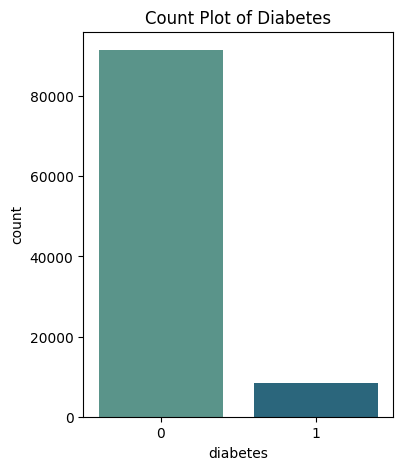

In [ ]:
# Plot a count distribution of 'diabetes' variable
plt.figure(figsize=(4,5))
sns.countplot(x='diabetes', data=df, palette='crest').set(title='Count Plot of Diabetes')
plt.show()

Observing the `diabetes` frequency data offered from the dataset, it can be inferred that there's a huge disparity between the number of individuals who are not diabetic and who suffers from diabetes. Consequently, the training model will be biased towards predicting individuals that don't have diabetes and struggles to predict that are diabetic. In the later section of this article, this problem can be tackled with oversampling the training data with SMOTE.

### Numerical Data

#### Age

<ipython-input-165-6e0bafb90242>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='age', ax=ax[1], palette='crest', width = 0.4)


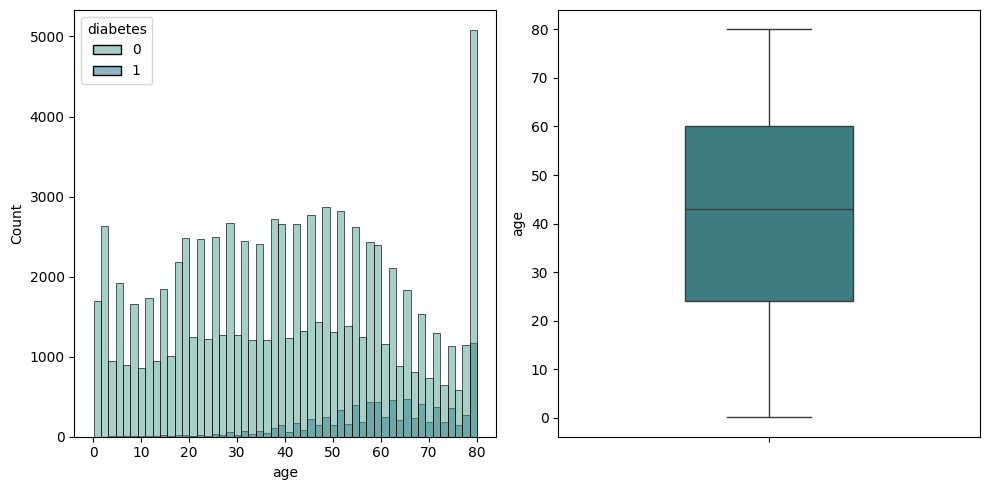

In [ ]:
# Histogram and boxplot for the 'age' variable divided by diabetes status
fig, ax = plt.subplots(figsize=(10,5),nrows=1, ncols=2)
sns.histplot(data=df,x='age', hue='diabetes',ax=ax[0], palette='crest')
sns.boxplot(data=df, y='age', ax=ax[1], palette='crest', width = 0.4)
plt.tight_layout()
plt.show()

#### BMI

<ipython-input-166-6cb3792a1228>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='bmi', ax=ax[1], palette='crest', width = 0.4)


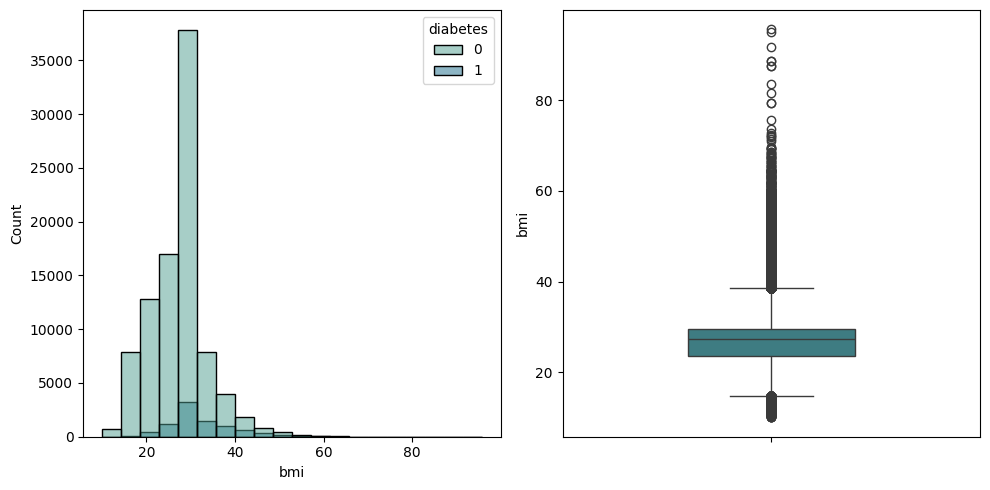

In [ ]:
# Histogram and boxplot for the 'bmi' variable divided by diabetes status
fig, ax = plt.subplots(figsize=(10,5),nrows=1, ncols=2)
sns.histplot(data=df,x='bmi', hue='diabetes',ax=ax[0], palette='crest', bins=20)
sns.boxplot(data=df, y='bmi', ax=ax[1], palette='crest', width = 0.4)
plt.tight_layout()
plt.show()

#### HbA1c Level

<ipython-input-167-34a058518c5f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='HbA1c_level', ax=ax[1], palette='crest', width = 0.4)


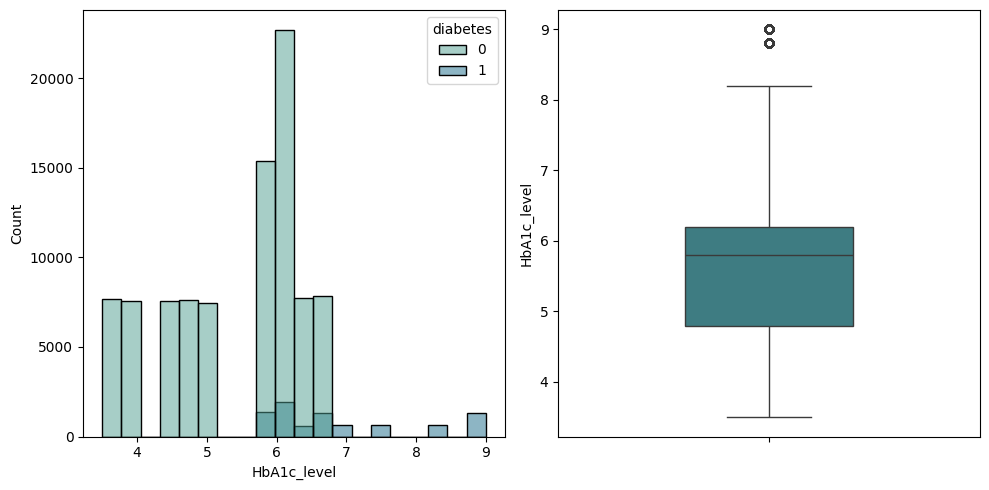

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),nrows=1, ncols=2)
sns.histplot(data=df,x='HbA1c_level', hue='diabetes',ax=ax[0], palette='crest', bins=20)
sns.boxplot(data=df, y='HbA1c_level', ax=ax[1], palette='crest', width = 0.4)
plt.tight_layout()
plt.show()

#### Blood Glucose Level

<ipython-input-168-761055bba608>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='blood_glucose_level', ax=ax[1], palette='crest', width = 0.4)


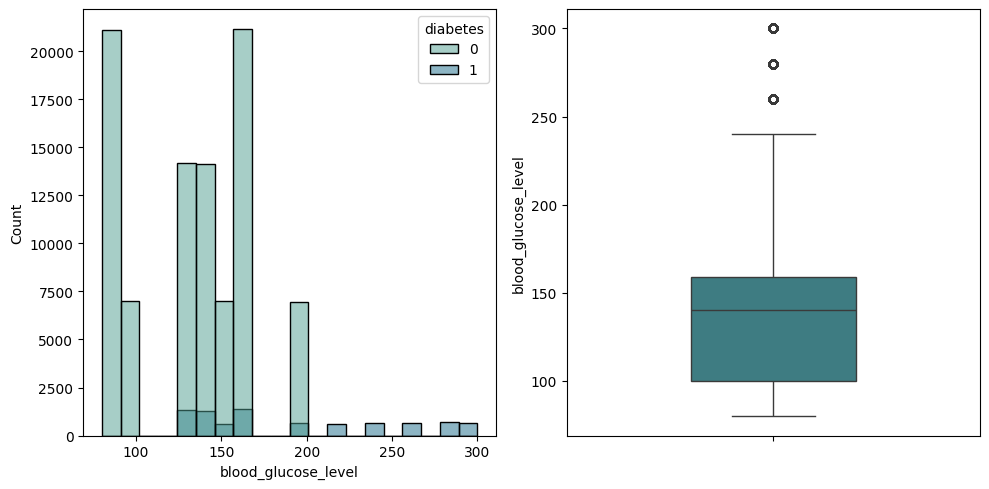

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),nrows=1, ncols=2)
sns.histplot(data=df,x='blood_glucose_level', hue='diabetes',ax=ax[0], palette='crest', bins=20)
sns.boxplot(data=df, y='blood_glucose_level', ax=ax[1], palette='crest', width = 0.4)
plt.tight_layout()
plt.show()

## Correlation Map

Correlation maps will explore relationships within a dataset containing both numerical and categorical features, particularly focusing on diabetes-related factors. `The first correlation graph` presents a comprehensive correlation matrix heatmap depicting correlations among all features, aiding in identifying patterns and associations. `The second correlation graph` specifically highlights correlations of individual features with the target variable, diabetes, providing insights into which factors might have stronger relationships with the presence of diabetes.

In [ ]:
#  Dataframe with numerical features
df_num_features = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]

# Dataframe with binary features
df_bin_features = df[['hypertension','heart_disease']]

# Using pandas get_dummies method for the categorical variables
df_cat_features_encoded = pd.concat([pd.get_dummies(df[cat_feature],prefix=cat_feature) for cat_feature in df[['gender','smoking_history']].columns.tolist()],axis=1)

# Concatenating all dataframes
df_all_features = pd.concat([df_num_features, df_bin_features, df_cat_features_encoded], axis=1)

df_all_features.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,25.19,6.6,140,0,0,1,True,False,False,False,False,False,False,True,False
1,54.0,27.32,6.6,80,0,0,0,True,False,False,True,False,False,False,False,False
2,28.0,27.32,5.7,158,0,0,0,False,True,False,False,False,False,False,True,False
3,36.0,23.45,5.0,155,0,0,0,True,False,False,False,True,False,False,False,False
4,76.0,20.14,4.8,155,0,1,1,False,True,False,False,True,False,False,False,False


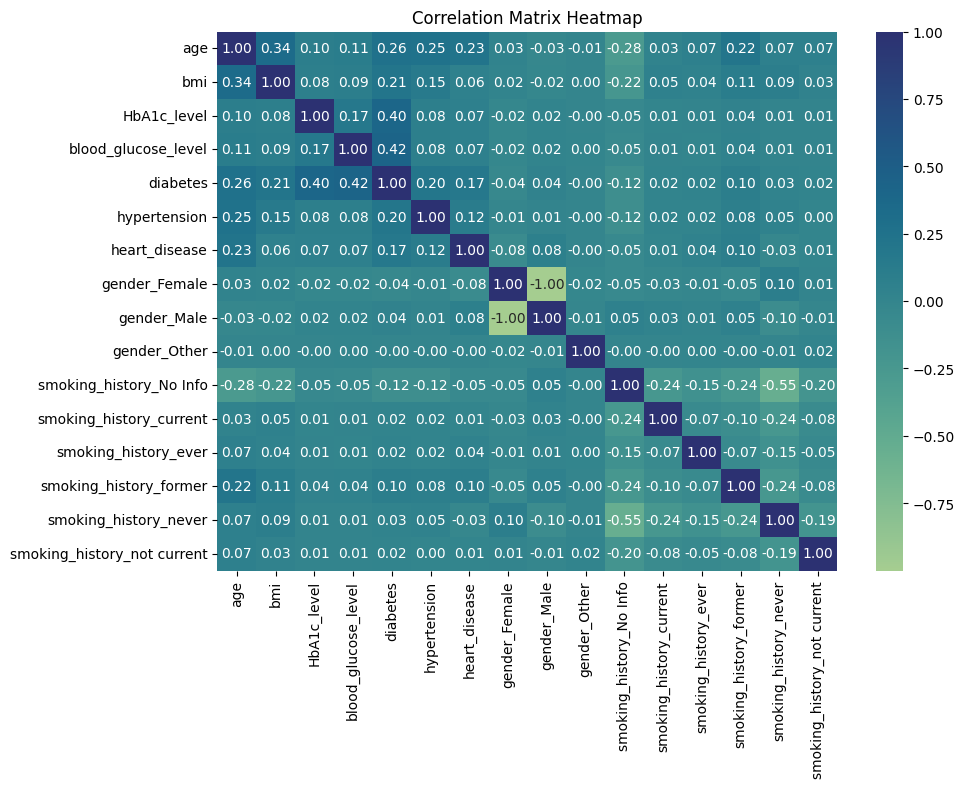

In [ ]:
# Correlation 1
plt.figure(figsize=(10,7))
sns.heatmap(df_all_features.corr(), cmap="crest", annot=True, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

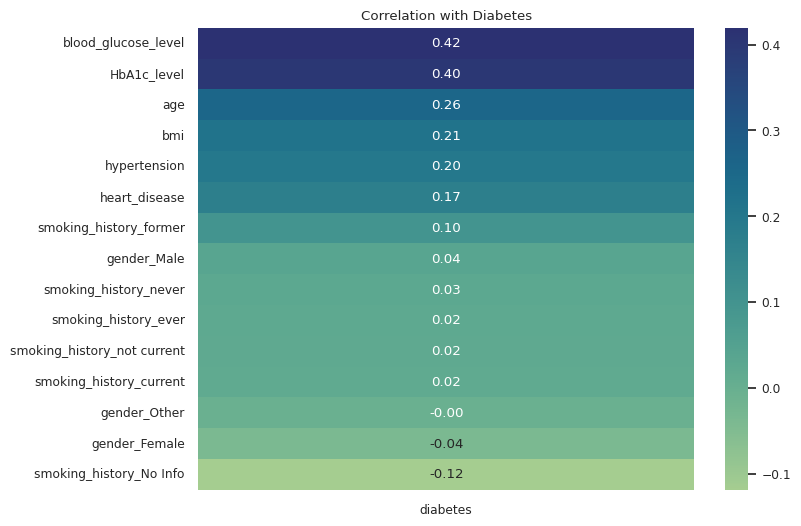

In [ ]:
# Correlation 2
# Create a heatmap of the correlations with the target column
corr = df_all_features.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="crest", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

# Data Preprocessing

To ensure the quality of exploratory data analysis and achieve optimal results for the data model, data preprocessing is needed. In data preprocessing, several essential steps ensure the quality and integrity of the dataset.

- Encode ordinal values to numerical equivalents, allowing algorithms to interpret them effectively.
- Address the correct data types.
- Null and duplicate values are addressed through techniques like imputation or deletion to prevent biased analyses.
- Remove unnecessary values.
- Standardization to scale features appropriately.

These preprocessing steps collectively lay a robust foundation for accurate and reliable data analysis in the field of data science.

In [ ]:
# Check duplicate values
df.duplicated().sum()

3854

In [ ]:
# Drop the duplicated values
df = df.drop_duplicates()

In [ ]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [ ]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

In [ ]:
df.shape

(96128, 9)

In [ ]:
df['age'].value_counts()

age
80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

In [ ]:
# Change the data type
df['age'] = df['age'].astype(int)

In [ ]:
columns = ['bmi']

for column_name in columns:
    Q1 = np.percentile(df[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation='midpoint')

    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Delete outliers in the specified column
    df = df[(df[column_name] >= low_lim) & (df[column_name] <= up_lim)]

In [ ]:
df.shape

(90774, 9)

In [ ]:
# Standardize numerical columns
scaler = StandardScaler()
df_scaled = df.copy()
num_column = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler.fit(df[num_column].values)

StandardScaler()

In [ ]:
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [ ]:
df_scaled[num_column] = scaler.transform(df[num_column].values)
df_scaled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.690220,0,1,never,-0.233179,1.013362,0.057083,0
1,Female,0.544157,0,0,No Info,0.173820,1.013362,-1.430131,0
2,Male,-0.601907,0,0,never,0.173820,0.168773,0.503248,0
3,Female,-0.249272,0,0,current,-0.565657,-0.488130,0.428887,0
4,Male,1.513903,1,1,current,-1.198129,-0.675816,0.428887,0
...,...,...,...,...,...,...,...,...,...
99994,Female,-0.249272,0,0,No Info,-0.345916,-0.675816,0.181018,0
99996,Female,-1.747971,0,0,No Info,-1.727418,0.919518,-0.934393,0
99997,Male,1.073109,0,0,former,0.271270,0.168773,0.428887,0
99998,Female,-0.778225,0,0,never,1.721562,-1.426561,-0.934393,0


In [ ]:
# Encoding categorical columns
df_scaled['gender'] = df_scaled['gender'].astype('category')
df_scaled['gender'] = df_scaled['gender'].cat.codes
df_scaled['smoking_history'] = df_scaled['smoking_history'].astype('category')
df_scaled['smoking_history'] = df_scaled['smoking_history'].cat.codes

In [ ]:
df['gender'].value_counts()

gender
Female    52477
Male      38297
Name: count, dtype: int64

In [ ]:
df_scaled['gender'].value_counts()

gender
0    52477
1    38297
Name: count, dtype: int64

In [ ]:
df['smoking_history'].value_counts()

smoking_history
never          32230
No Info        31574
current         8668
former          8589
not current     5986
ever            3727
Name: count, dtype: int64

In [ ]:
df_scaled['smoking_history'].value_counts()

smoking_history
4    32230
0    31574
1     8668
3     8589
5     5986
2     3727
Name: count, dtype: int64

# Prediction and Model Fitting

To tackle our classification problem, we've chosen the **CatBoost classifier** for various reasons. Based on their website, [catboost.ai](https://catboost.ai):

> CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.

In comparison to other classifiers in the market, CatBoost consistently outperforms its competitors such as XGBoost and Random Forests. One of its significant advantages is the short training time for decision trees, often completing training with optimal results. This efficiency significantly benefits for our team, enabling us to train models with default parameters quickly while still achieving optimal prediction accuracy.

In [ ]:
# Define data training and target
X = df_scaled.drop(['diabetes'], axis=1)
y = df_scaled['diabetes']

# Training/Test split and oversampling using SMOTE
OS = SMOTE(random_state=25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, y_train = OS.fit_resample(X_train, y_train)

To address the issue of class imbalance observed during the exploratory data analysis (EDA) phase, implementing **SMOTE (Synthetic Minority Over-sampling Technique)** to oversample the minority class in the training data can be an effective strategy.

By generating synthetic samples for the minority class, SMOTE helps mitigate the imbalance and ensures that the model is trained on a more representative dataset. This approach not only prevents the model from being biased towards the majority class but also enhances the model's ability to generalize to unseen data. By balancing the class distribution in the training data, SMOTE contributes to improving the overall quality and reliability of the model's predictions, particularly for the minority class.

In [ ]:
# Model Fitting
cb = CatBoostClassifier()
cb.fit(X_train, y_train)

Learning rate set to 0.083319
0:	learn: 0.4950884	total: 30ms	remaining: 29.9s
1:	learn: 0.3825180	total: 56.3ms	remaining: 28.1s
2:	learn: 0.3129689	total: 83ms	remaining: 27.6s
3:	learn: 0.2805200	total: 119ms	remaining: 29.7s
4:	learn: 0.2580398	total: 155ms	remaining: 30.9s
5:	learn: 0.2323825	total: 189ms	remaining: 31.4s
6:	learn: 0.2182758	total: 224ms	remaining: 31.8s
7:	learn: 0.2076028	total: 251ms	remaining: 31.1s
8:	learn: 0.1986117	total: 278ms	remaining: 30.6s
9:	learn: 0.1891908	total: 313ms	remaining: 31s
10:	learn: 0.1824305	total: 342ms	remaining: 30.8s
11:	learn: 0.1762395	total: 371ms	remaining: 30.6s
12:	learn: 0.1710014	total: 404ms	remaining: 30.7s
13:	learn: 0.1649446	total: 436ms	remaining: 30.7s
14:	learn: 0.1614543	total: 473ms	remaining: 31.1s
15:	learn: 0.1556050	total: 533ms	remaining: 32.8s
16:	learn: 0.1519932	total: 580ms	remaining: 33.5s
17:	learn: 0.1489579	total: 625ms	remaining: 34.1s
18:	learn: 0.1460958	total: 689ms	remaining: 35.6s
19:	learn: 0.1

In [ ]:
pickle.dump(cb, open("model.pkl", "wb"))

In [ ]:
# Classifier predicting data testing
y_pred = cb.predict(X_test)

### Accuracy Score

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9722390526025888


The CatBoost classifier achieved around a 97% accuracy score, which is a significant number, indicating that the model is highly effective at correctly classifying instances in the dataset.

However, accuracy alone may not provide a complete picture of the model's performance, especially in scenarios where class distribution is imbalanced or where different types of errors carry varying degrees of importance.

### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     16727
           1       0.93      0.70      0.80      1428

    accuracy                           0.97     18155
   macro avg       0.95      0.85      0.89     18155
weighted avg       0.97      0.97      0.97     18155



The model achieves exceptionally high precision, recall, and F1-score for both classes. For class 0 (absence of the condition), the precision is 0.97, recall is 1.00, and F1-score is 0.98, indicating the model's ability to accurately identify instances without the condition.

Similarly, for class 1 (presence of the condition), the precision is 0.94, recall is 0.70, and F1-score is 0.80, showcasing the model's decent proficiency in correctly classifying instances with the condition.

The overall accuracy of the model is 97%, with macro and weighted average metrics also reflecting high scores, indicating consistent performance across both classes. This suggests that the model effectively discriminates between the two classes and demonstrates robustness in its predictions.

### Confusion Matrix

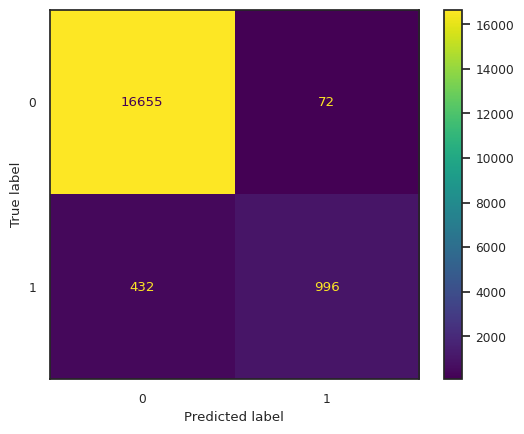

In [ ]:
# Displaying Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cb.classes_)
disp.plot()
plt.show()

In [ ]:
# Showing true results of y_test split
y_test.value_counts()

diabetes
0    16727
1     1428
Name: count, dtype: int64

From the confusion matrix that our team gathered, it can be inferred that the model scored 17000+ True Negatives and True Positives, while the remaining 1200+ predictions were False Positives and False Negatives.

Our team can conclude that the model can consistently predicts individuals who has a diabetes or not.

### Feature Importance

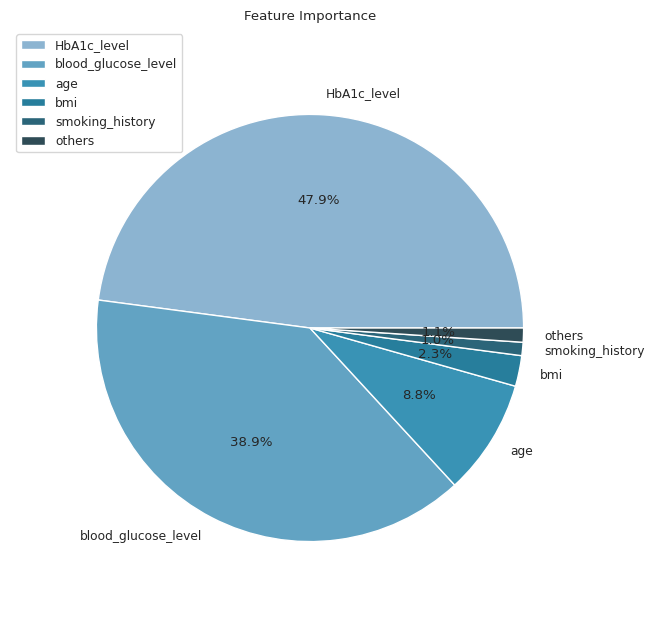

In [ ]:
# Gather Feature Importance from CatBoost classifier
fi = cb.get_feature_importance(prettified=True)

# Categorize features with importance less than 1 as others
fi_df = fi[fi['Importances'] >= 1].copy()
new_row = pd.DataFrame(data={
    'Feature Id' : ['others'],
    'Importances' : [fi['Importances'][fi['Importances'] < 1].sum() ]
})
fi_df = pd.concat([fi_df, new_row])

# Visualize
fig, axes = plt.subplots(figsize = (6,6))
plt.subplots_adjust(1,0.5,2,5)
axes.set_title('Feature Importance')
plt.pie(fi_df['Importances'], labels=fi_df['Feature Id'], radius=0.89, autopct='%1.1f%%')
plt.legend(loc = 'upper left')
plt.show()

From the feature importance gathered from the model, HbA1c or hemoglobin and blood glucose levels holds an important role in determining whether an individual is diabetic or not. This confirms the real-world application of diabetes check-ups, where monitoring blood glucose and hemoglobin levels helps determine diabetic status.

# Conclusion

Based on the results of the data analysis that has been carried out, the following conclusions can be drawn.
1. Diabetes prediction data that has been explored and analyzed using statistical methods produces important information regarding characteristics and relationships between features.
2. Diabetes prediction data that has gone through the preprocessing stage by handling missing values, handling duplicate data, and removing noise, has much better quality.
3. From feature importance
it can be inferred that
Hemoglobin and blood glucose are both important features that determine diabetes or not.
4. Several model screening experiments have been carried out, from Linear Regression, Random Forest, Catboost and XGBoost, it was found that the Catboost model has the highest accuracy value, namely 0.9722 or equivalent to 97%

# Appendix: Other Classifier (Comparison)

## XGBoost

XGBoost Model Accuracy: 0.9718534838887359
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     16727
           1       0.92      0.70      0.80      1428

    accuracy                           0.97     18155
   macro avg       0.95      0.85      0.89     18155
weighted avg       0.97      0.97      0.97     18155



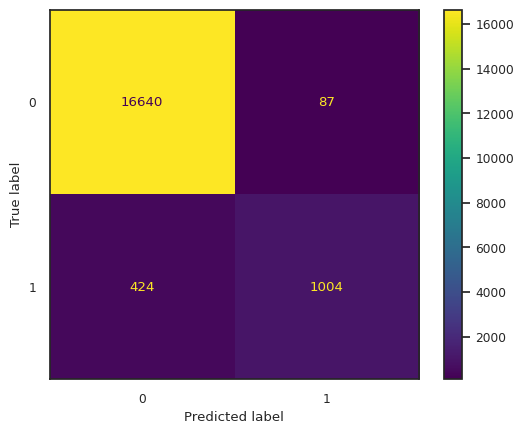

In [ ]:
# Create and train the XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("XGBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()

## Logistic Regression


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.88
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     16727
           1       0.39      0.88      0.55      1428

    accuracy                           0.88     18155
   macro avg       0.69      0.88      0.74     18155
weighted avg       0.94      0.88      0.90     18155



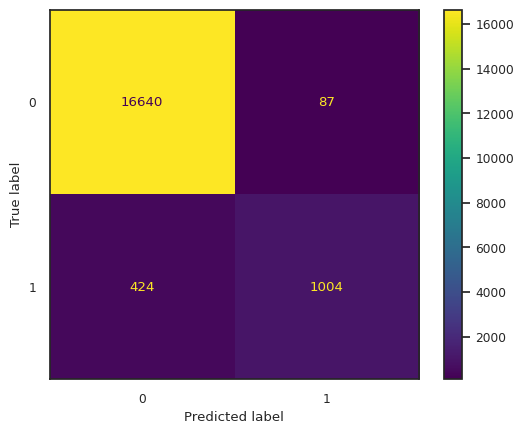

In [ ]:
# Displaying Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=logistic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot()
plt.show()

## Random Forest

In [ ]:
# Create Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate AUC
random_forest_auc = roc_auc_score(y_test, random_forest_predictions)

# Generate ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest_predictions)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, random_forest_predictions)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(y_test, random_forest_predictions))

Random Forest Accuracy: 0.9611677223905261
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16727
           1       0.76      0.73      0.75      1428

    accuracy                           0.96     18155
   macro avg       0.87      0.86      0.86     18155
weighted avg       0.96      0.96      0.96     18155



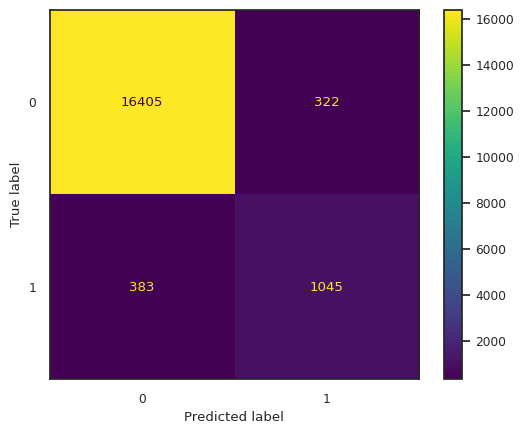

In [ ]:
# Displaying Confusion Matrix
cm_rf = confusion_matrix(y_test, random_forest_predictions, labels=random_forest_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest_model.classes_)
disp_rf.plot()
plt.show()